# Demo on different label overview
- Show labeling different on more representive image 
    - Event tracking labeling
    - Ancient/Generation tracking labeling
    - Error edge labeling

In [1]:
import sys
import os

# Append the directory of the module to the Pyt
# hon path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit")

In [2]:
from cell import Cell
from link_composer import LinkComposer
import cells_extractor 
import visualizer
import link_algorithm
from cell_event import CellEvent, CellDefine, Cell

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import matplotlib.patches as patches
import networkx as nx

In [4]:
mask_folder = "/Users/sherryyang/Documents/wiggins-lab/data/1119/xy5/masks/*.png"
phase_folder = "/Users/sherryyang/Documents/wiggins-lab/data/1119/xy5/phase/*c1.tif"
composer = LinkComposer.read_folder(mask_folder=mask_folder, phase_folder=phase_folder)

In [5]:
G = link_algorithm.silly_linker(composer)

Event Tracking labeling

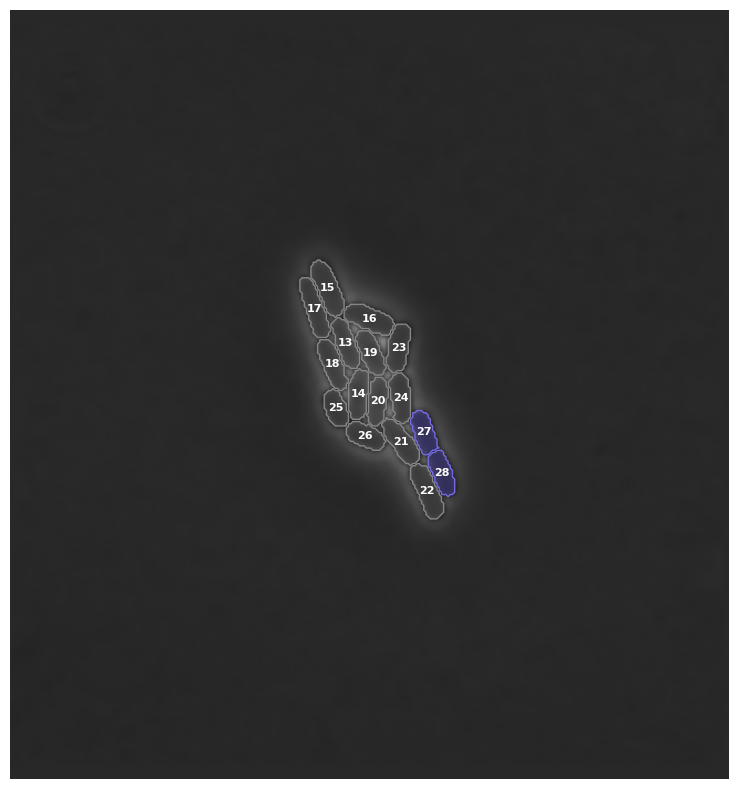

In [6]:
info = visualizer.get_label_info(G)
composer.show_frame_phase(G, 25, info, fontsize = 8, figsize = (8,8), save = True)

Ancient tracking labeling

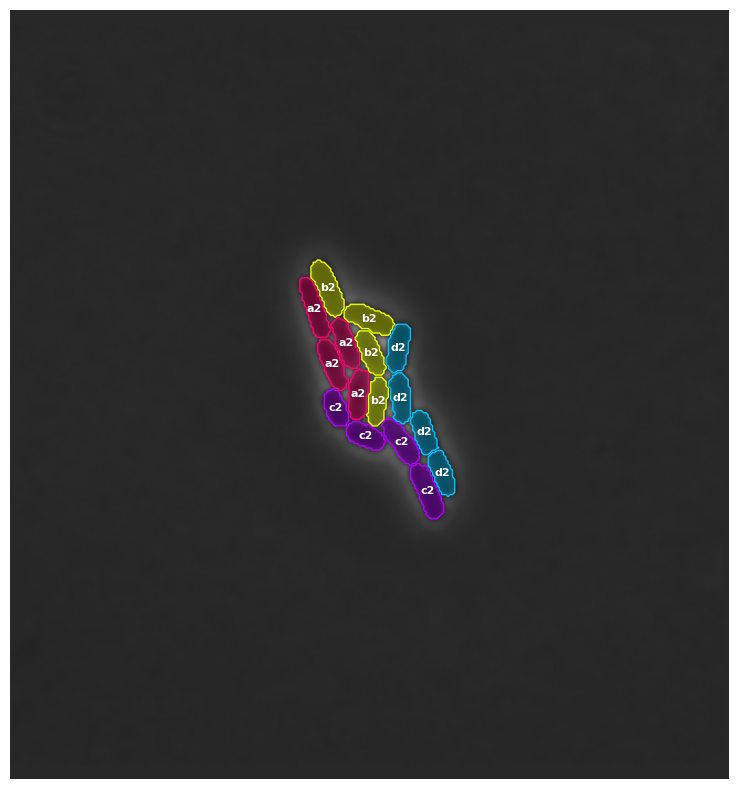

In [7]:
info = visualizer.get_generation_label_info(G)
composer.show_frame_phase(G, 25, info, fontsize = 8, figsize = (8,8), save = True)

Error Tracking labeling:
- this used to compare with ground truth, but since I have no time to handle read ground truth code, so use difference between two algorithm to replace

In [8]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/1119/spots_lap.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/1119/edges_lap.csv"
G1 = composer.get_trackmate_linking_result(spots_filename, edge_filename)

In [16]:
G_extra_edge = set(G1.edges()).difference(set(G.edges()))
warning_label = visualizer.get_edges_related_label_info(G1, G_extra_edge)

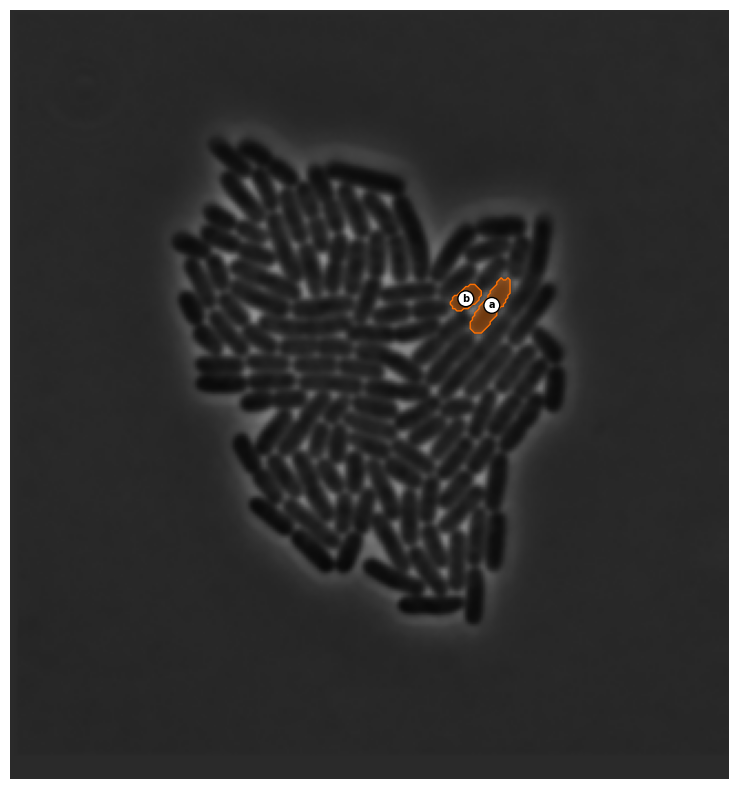

In [18]:
composer.show_frame_phase(G = G1, frame = 80, info = warning_label, circle_label=True, save=True, fontsize = 7, figsize = (8,8), representative_point=True)